In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [ ]:
dollar_imbalance_bars = pd.read_csv('official_data/es_dollar_imbalance_5_prev_bars.csv',)
dollar_bars = pd.read_csv('official_data/dollar_bars.csv')

In [28]:
dollar_imbalance_bars.date_time = pd.to_datetime(dollar_imbalance_bars.date_time)
dollar_bars.date_time = pd.to_datetime(dollar_bars.date_time)

In [29]:
filter_dates = dollar_imbalance_bars.date_time.dt.date.unique()[0:20]

In [30]:
# take first 20 days 
dollar_bars = dollar_bars[dollar_bars.date_time.dt.date.isin(filter_dates)]
dollar_imbalance_bars = dollar_imbalance_bars[dollar_imbalance_bars.date_time.dt.date.isin(filter_dates)] 

In [31]:
dollar_bars.shape[0], dollar_imbalance_bars.shape[0]

(1105, 704709)

In [32]:
dollar_returns = np.log(dollar_bars['close']).diff().dropna()
dollar_imb_returns = np.log(dollar_imbalance_bars['close']).diff().dropna()

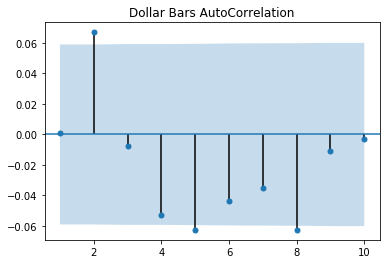

In [33]:
plot_acf(dollar_returns, lags=10, zero=False)
plt.title('Dollar Bars AutoCorrelation')
plt.show()


<Figure size 1440x720 with 0 Axes>

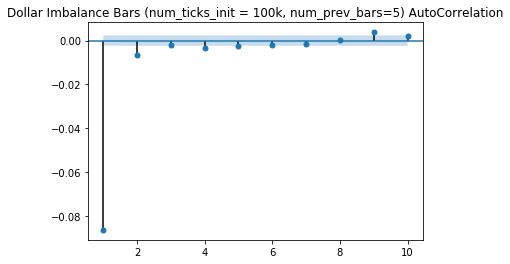

In [34]:
plot_acf(dollar_imb_returns, lags=10, zero=False)
plt.title('Dollar Imbalance Bars (num_ticks_init = 100k, num_prev_bars=5) AutoCorrelation')
plt.show()